In [1]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit
import random as rd
import time

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
file_url="UCI_Credit_Card.csv"

df_credit=pd.read_csv(file_url)

In [3]:
df_credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df_credit.groupby('SEX').count()
#1 = male 
#2 = female

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
SEX,,,,,,,,,,,,,,,,,,,,,
1,11888,11888,11888,11888,11888,11888,11888,11888,11888,11888,...,11888,11888,11888,11888,11888,11888,11888,11888,11888,11888
2,18112,18112,18112,18112,18112,18112,18112,18112,18112,18112,...,18112,18112,18112,18112,18112,18112,18112,18112,18112,18112


In [9]:
df_credit.groupby('EDUCATION').count()
# 0 ???
# 1 graduate
# 2 university
# 3 high school
# 4 others
# 5 ???
# 6 ???

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585,...,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585
2,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030,...,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030
3,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,...,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917
4,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
5,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
6,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


In [10]:
df_credit.groupby('MARRIAGE').count()
# 0 ???
# 1 married
# 2 single
# 3 others

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
1,13659,13659,13659,13659,13659,13659,13659,13659,13659,13659,...,13659,13659,13659,13659,13659,13659,13659,13659,13659,13659
2,15964,15964,15964,15964,15964,15964,15964,15964,15964,15964,...,15964,15964,15964,15964,15964,15964,15964,15964,15964,15964
3,323,323,323,323,323,323,323,323,323,323,...,323,323,323,323,323,323,323,323,323,323


In [4]:
ageCount={}
ageGenderCount={}

for index,row in df_credit.iterrows():
    age=row['AGE']
    gender=row['SEX']
    if not age in ageCount:
        ageCount[age]=0
    ageCount[age]+=1
    
    if gender==1:
        gender='male'
    elif gender==2:
        gender='female'
            
    if not gender in ageGenderCount:
        ageGenderCount[gender]={}

    if not age in ageGenderCount[gender]:
        ageGenderCount[gender][age]=0
        
    ageGenderCount[gender][age]+=1

Text(0.5, 1.0, 'Demography of clients by age')

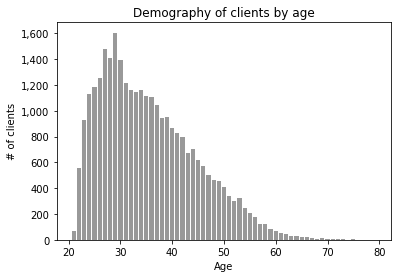

In [20]:
plt.bar(ageCount.keys(),ageCount.values(),color='#999999')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of clients by age')

Text(0.5, 1.0, 'Demography of Male clients by age')

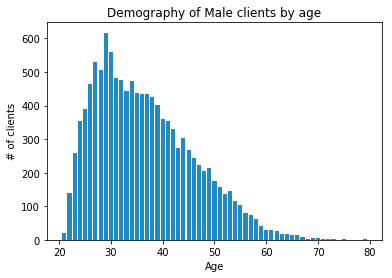

In [18]:
plt.bar(ageGenderCount['male'].keys(),ageGenderCount['male'].values(),color='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of Male clients by age')

Text(0.5, 1.0, 'Demography of Female clients by age')

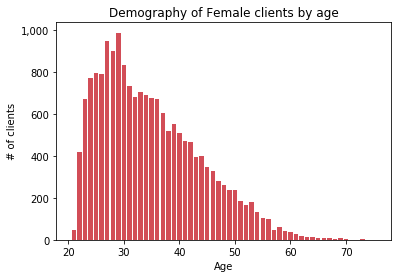

In [45]:
plt.bar(ageGenderCount['female'].keys(),ageGenderCount['female'].values(),color='#d24d57')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of Female clients by age')

In [27]:
ageIfDefaultCount={}
ageGenderIfDefaultCount={}

for index,row in df_credit.iterrows():
    age=row['AGE']
    gender=row['SEX']
    default=row['default.payment.next.month']
    if default==1.0:
        if not age in ageIfDefaultCount:
            ageIfDefaultCount[age]=0
        ageIfDefaultCount[age]+=1

        if gender==1:
            gender='male'
        elif gender==2:
            gender='female'

        if not gender in ageGenderIfDefaultCount:
            ageGenderIfDefaultCount[gender]={}

        if not age in ageGenderIfDefaultCount[gender]:
            ageGenderIfDefaultCount[gender][age]=0

        ageGenderIfDefaultCount[gender][age]+=1

Text(0.5, 1.0, 'Demography of clients if defaulting by age')

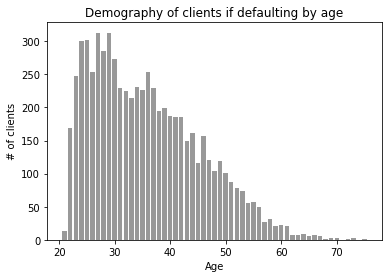

In [28]:
plt.bar(ageIfDefaultCount.keys(),ageIfDefaultCount.values(),color='#999999')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of clients if defaulting by age')

Text(0.5, 1.0, 'Demography of Male clients by age')

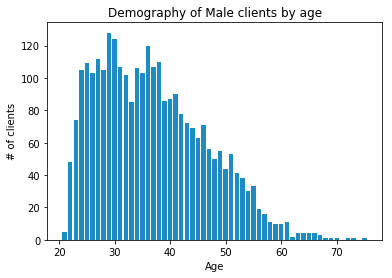

In [29]:
plt.bar(ageGenderIfDefaultCount['male'].keys(),ageGenderIfDefaultCount['male'].values(),color='#1E8BC3')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of Male clients by age')

Text(0.5, 1.0, 'Demography of Female clients by age')

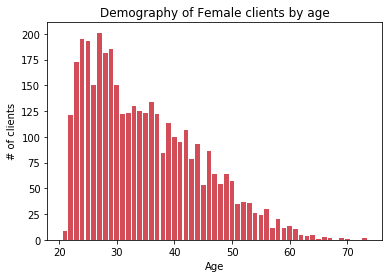

In [44]:
plt.bar(ageGenderIfDefaultCount['female'].keys(),ageGenderIfDefaultCount['female'].values(),color='#d24d57')
ax = plt.subplot()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of Female clients by age')

In [38]:
defaultRatioAgeCount={}
defaultRatioAgeGenderCount={}

defaultRatioAgeGenderCount['male']={}
defaultRatioAgeGenderCount['female']={}

for age,freq in ageCount.items():
    
    ratio=0.0
    
    if age in ageIfDefaultCount:
        ratio=ageIfDefaultCount[age]/ageCount[age]
        
        defaultRatioAgeCount[age]=ratio
        
    ratio=0.0
        
    if age in ageGenderIfDefaultCount['male']:
        
        ratio=ageGenderIfDefaultCount['male'][age]/ageGenderCount['male'][age]
        
        defaultRatioAgeGenderCount['male'][age]=ratio
        
    ratio=0.0
        
    if age in ageGenderIfDefaultCount['female']:
        
        ratio=ageGenderIfDefaultCount['female'][age]/ageGenderCount['female'][age]
        
        defaultRatioAgeGenderCount['female'][age]=ratio

Text(0.5, 1.0, 'Default ratio by age')

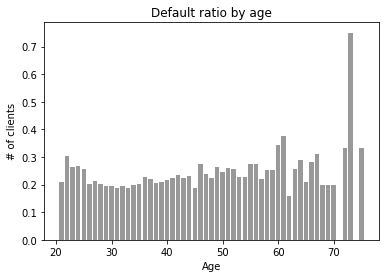

In [36]:
plt.bar(defaultRatioAgeCount.keys(),defaultRatioAgeCount.values(),color='#999999')
ax = plt.subplot()
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Default ratio by age')

Text(0.5, 1.0, 'Demography of Male clients by age')

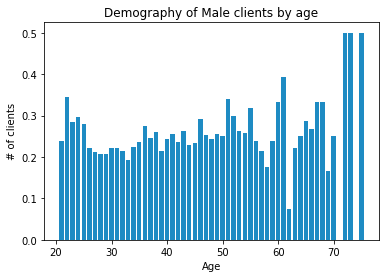

In [41]:
plt.bar(defaultRatioAgeGenderCount['male'].keys(),defaultRatioAgeGenderCount['male'].values(),color='#1E8BC3')
ax = plt.subplot()
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of Male clients by age')

Text(0.5, 1.0, 'Demography of Female clients by age')

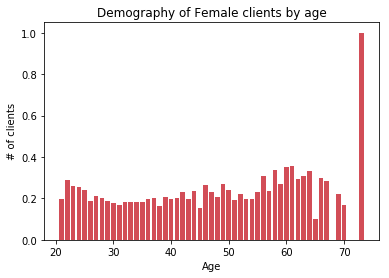

In [43]:
plt.bar(defaultRatioAgeGenderCount['female'].keys(),defaultRatioAgeGenderCount['female'].values(),color='#d24d57')
ax = plt.subplot()
ax.set_xlabel('Age')
ax.set_ylabel('# of clients')
plt.title('Demography of Female clients by age')

In [46]:
marriageCount={}
marriageIfDefaultCount={}

for index,row in df_credit.iterrows():

    marriage=row['MARRIAGE']
    default=row['default.payment.next.month']
    
    if not marriage in marriageCount:
        marriageCount[marriage]=0
            
    marriageCount[marriage]+=1
    
    if default==1.0:
        if not marriage in marriageIfDefaultCount:
            marriageIfDefaultCount[marriage]=0
            
        marriageIfDefaultCount[marriage]+=1

In [47]:
defaultRatioMarriageCount={}

for marriage,freq in marriageCount.items():
    
    defaultRatioMarriageCount[marriage]=marriageIfDefaultCount[marriage]/marriageCount[marriage]
    
defaultRatioMarriageCount

{1.0: 0.23471703638626545,
 2.0: 0.20928338762214985,
 3.0: 0.26006191950464397,
 0.0: 0.09259259259259259}

In [50]:
min(ageCount.keys()),max(ageCount.keys())

(21.0, 79.0)

In [5]:
# For Neural Network model

client_input=[]
client_output=[]

for index,row in df_credit.iterrows():
    
    temp_input=[0]*21
    
    age=row['AGE']
    gender=row['SEX']
    
    if gender==1:
        temp_input[0]=1
        
    age_normalized=(age-min(ageCount.keys()))/(max(ageCount.keys())-min(ageCount.keys()))
    temp_input[1]=age_normalized

    education_index=row['EDUCATION']
    marriage_index=row['MARRIAGE']
    
    temp_input[2+int(education_index)]=1
    temp_input[9+int(marriage_index)]=1
  
    temp_input[13]=row['LIMIT_BAL']/1000000
    
    for k in range(0,7):
        pay_status_index='PAY_'+str(k)
        
        pay_status=0
        
        if pay_status_index in row:
            pay_status=row[pay_status_index]
            
        pay_status_normalized=(pay_status-(-2))/(8-(-2))
        
        temp_input[14+k]=pay_status_normalized
        
        #bill_amount_index='BILL_AMT'+str(k)
        #pay_amount_index='PAY_AMT'+str(k)
        
        #bill=0
        #pay=0
        
        #if pay_amount_index in row:
            #pay=row[pay_amount_index]
            
        #if bill_amount_index in row:
            #bill=row[bill_amount_index]
            
        #if bill!=0:
            #payment_ratio=pay/bill
        #else:
            #payment_ratio=1
        #temp_input[14+k]=payment_ratio
 
    default=row['default.payment.next.month']
        
    client_input.append(temp_input)
    client_output.append([default])

In [5]:
#For Tree model

client_input=[]
client_output=[]

for index,row in df_credit.iterrows():
    
    temp_input=[0]*19
    
    age=row['AGE']
    gender=row['SEX']
    
    if gender==1:
        temp_input[0]=1

    temp_input[1]=age


    temp_input[2]=row['EDUCATION']
    temp_input[3]=row['MARRIAGE']
  
    temp_input[4]=row['LIMIT_BAL']
    
    for k in range(0,7):
        pay_status_index='PAY_'+str(k)
        
        pay_status=0
        
        if pay_status_index in row:
            pay_status=row[pay_status_index]

        temp_input[5+k]=pay_status
        
        
        bill_amount_index='BILL_AMT'+str(k)
        pay_amount_index='PAY_AMT'+str(k)
        
        bill=0
        pay=0
        
        if pay_amount_index in row:
            pay=row[pay_amount_index]
            
        if bill_amount_index in row:
            bill=row[bill_amount_index]
            
        if bill!=0:
            payment_ratio=pay/bill
        else:
            payment_ratio=9999
        temp_input[12+k]=payment_ratio
        
                
    default=row['default.payment.next.month']
        
    client_input.append(temp_input)
    client_output.append([default])

In [6]:
client_input_np=np.array(client_input)
client_output_np=np.array(client_output)

In [7]:
from sklearn.model_selection import train_test_split
client_input_train,client_input_test, client_output_train,client_output_test = train_test_split(client_input_np, client_output_np, test_size=0.1)

In [8]:
len(client_input_train)

27000

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
#sess = tf.Session(config=config) 
#keras.backend.set_session(sess)

Using TensorFlow backend.
C:\Users\vjib\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vjib\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vjib\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vjib\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [10]:
# Neural network
model = Sequential()
model.add(Dense(25, input_dim=len(client_input_train[0]), activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(len(client_output_train[0]), activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(client_input_train,client_output_train, epochs=50, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
27000/27000 [==============================] - 8s 315us/step - loss: 0.4841 - acc: 0.7964
Epoch 2/50
27000/27000 [==============================] - 4s 145us/step - loss: 0.4549 - acc: 0.8124
Epoch 3/50
27000/27000 [==============================] - 4s 144us/step - loss: 0.4485 - acc: 0.8162
Epoch 4/50
27000/27000 [==============================] - 4s 142us/step - loss: 0.4455 - acc: 0.8173
Epoch 5/50
27000/27000 [==============================] - 4s 142us/step - loss: 0.4434 - acc: 0.8181
Epoch 6/50
27000/27000 [==============================] - 4s 142us/step - loss: 0.4423 - acc: 0.8181
Epoch 7/50
27000/27000 [==============================] - 4s 144us/step - loss: 0.4408 - acc: 0.8183
Epoch 8/50
27000/27000 [==============================] - 4s 142us/step - loss: 0.4397 - acc: 0.8199
Epoch 9/50
27000/27000 [==============================] - 4s 148us/step - loss: 0.4388 - acc: 0.8200
Epoch 10/50
27000/27000 [==================

In [13]:
model.evaluate(client_input_test,client_output_test)

3000/3000 [==============================] - 0s 68us/step


[0.4415939870675405, 0.8156666665077209]

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 1000 trees
model = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(client_input_train,client_output_train)

C:\Users\vjib\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
print(f'Model Accuracy: {model.score(client_input_train,client_output_train)}')

Model Accuracy: 0.9991851851851852


In [11]:
print(f'Model Accuracy: {model.score(client_input_test,client_output_test)}')

Model Accuracy: 0.8226666666666667


In [19]:
predicted=model.predict(client_input_train)

precision=precision_score(client_output_train,predicted, average='macro')
recall=recall_score(client_output_train,predicted, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.99911773784483
Model Recall: 0.9985216515865329


In [20]:
predicted=model.predict(client_input_test)

precision=precision_score(client_output_test,predicted, average='macro')
recall=recall_score(client_output_test,predicted, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7493878113648158
Model Recall: 0.661803504212578


In [102]:
# Actual class predictions
rf_predictions = model.predict(client_input_test)
# Probabilities for each class
rf_probs = model.predict_proba(client_input_test)[:, 1]

In [103]:
rf_predictions

array([0., 0., 0., ..., 1., 0., 0.])

In [104]:
rf_probs

array([0.075     , 0.317     , 0.067     , ..., 0.712     , 0.02191667,
       0.077     ])

In [105]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(client_output_test, rf_probs)

print(roc_value)

0.7583851333851334


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=5000,learning_rate=0.05)

model.fit(client_input_train,client_output_train)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [30]:
print(f'Model Accuracy: {model.score(client_input_train,client_output_train)}')

Model Accuracy: 0.8797037037037037


In [31]:
print(f'Model Accuracy: {model.score(client_input_test,client_output_test)}')

Model Accuracy: 0.8176666666666667


In [32]:
predicted=model.predict(client_input_train)

precision=precision_score(client_output_train,predicted, average='macro')
recall=recall_score(client_output_train,predicted, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.8727443793533283
Model Recall: 0.7597330629583336


In [33]:
predicted=model.predict(client_input_test)

precision=precision_score(client_output_test,predicted, average='macro')
recall=recall_score(client_output_test,predicted, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.737876325627913
Model Recall: 0.6546863122121361


In [34]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1000)
model.fit(client_input_train,client_output_train)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [35]:
print(f'Model Accuracy: {model.score(client_input_train,client_output_train)}')

Model Accuracy: 0.8402592592592593


In [36]:
print(f'Model Accuracy: {model.score(client_input_test,client_output_test)}')

Model Accuracy: 0.82


In [37]:
predicted=model.predict(client_input_train)

precision=precision_score(client_output_train,predicted, average='macro')
recall=recall_score(client_output_train,predicted, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7995844143588697
Model Recall: 0.6920192626295293


In [38]:
predicted=model.predict(client_input_test)

precision=precision_score(client_output_test,predicted, average='macro')
recall=recall_score(client_output_test,predicted, average='macro')

print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')

Model Precision: 0.7456726113195099
Model Recall: 0.6528036067979935
